# Random Forest Model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score

import itertools as it

#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image
import time as time

np.warnings.filterwarnings('ignore')

In [4]:
red_train_x = pd.read_csv('red_train_x.csv')
red_train_y = pd.read_csv('red_train_y.csv')
red_test_x = pd.read_csv('red_test_x.csv')
red_test_y = pd.read_csv('red_test_y.csv')

white_train_x = pd.read_csv('white_train_x.csv')
white_train_y = pd.read_csv('white_train_y.csv')
white_test_x = pd.read_csv('white_test_x.csv')
white_test_y = pd.read_csv('white_test_y.csv')

combined_train_x = pd.read_csv('combined_train_x')
combined_train_y = pd.read_csv('combined_train_y')
combined_test_x = pd.read_csv('combined_test_x')
combined_test_y = pd.read_csv('combined_test_y')

# Create Base RandomForest Models

In [5]:
#Red
base_model_red = RandomForestRegressor().fit(red_train_x, red_train_y)
y_pred = base_model_red.predict(red_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(red_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(red_test_y, y_pred))

RMSE: 0.6128280754012498
MAE: 0.44402500000000006


In [107]:
#Red ROUNDED
base_model_red = RandomForestRegressor().fit(red_train_x, red_train_y)
y_pred = base_model_red.predict(red_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(red_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(red_test_y, y_pred_rounded))

RMSE: 0.6670832032063166
MAE: 0.365


In [6]:
#White
base_model_white = RandomForestRegressor().fit(white_train_x, white_train_y)
y_pred = base_model_white.predict(white_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred))

RMSE: 0.6007932171687014
MAE: 0.43059591836734695


In [110]:
#White ROUNDED
base_model_white = RandomForestRegressor().fit(white_train_x, white_train_y)
y_pred = base_model_white.predict(white_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred_rounded))

RMSE: 0.6356741560367711
MAE: 0.3485714285714286


In [7]:
#Combined
base_model_combined = RandomForestRegressor().fit(combined_train_x, combined_train_y)
y_pred = base_model_combined.predict(combined_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred))

RMSE: 0.6090083238031632
MAE: 0.43710153846153843


In [111]:
#Combined ROUNDED
base_model_combined = RandomForestRegressor().fit(combined_train_x, combined_train_y)
y_pred = base_model_combined.predict(combined_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred_rounded))

RMSE: 0.6487858482758982
MAE: 0.35323076923076924


# Tuning Red Model

In [68]:
n_samples = red_train_x.shape[0]
n_features = red_train_x.shape[1]

params = {'n_estimators': [700, 1000, 2000, 3000],
          'max_features': list(range(2,13,2)),
          'bootstrap': [True, False]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
rf_regressor_grid.fit(red_train_x, red_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

Best Parameters :  {'bootstrap': False, 'max_features': 2, 'n_estimators': 3000}


In [82]:
# Red Model with optimal parameters opto RMSE
optimal_model_red = RandomForestRegressor(n_estimators=3000, random_state=1,
                                          bootstrap = False,n_jobs=-1, max_features=2).fit(red_train_x, red_train_y)

y_pred = optimal_model_red.predict(red_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(red_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(red_test_y, y_pred))

RMSE: 0.6049555777998176
MAE: 0.410185


In [83]:
#Further tuning red model with intuition + ROUNDING
intuition_model_red = RandomForestRegressor(n_estimators=3000, random_state=1,
                                          bootstrap = False,n_jobs=-1, max_features=2).fit(red_train_x, red_train_y)

y_pred = intuition_model_red.predict(red_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(red_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(red_test_y, y_pred_rounded))

RMSE: 0.6652067347825036
MAE: 0.3675


<AxesSubplot:xlabel='pred_y', ylabel='quality'>

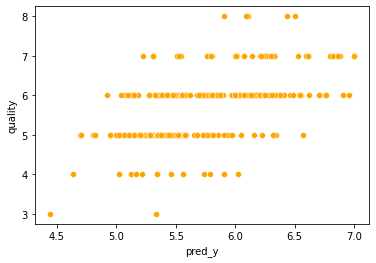

In [59]:
pred_vs_acc = pd.concat([(pd.DataFrame(y_pred, columns=["pred_y"])), red_test_y], axis = 1)
sns.scatterplot(x = 'pred_y', y = 'quality', data = pred_vs_acc, color = 'orange')

<AxesSubplot:xlabel='pred_y_rounded', ylabel='quality'>

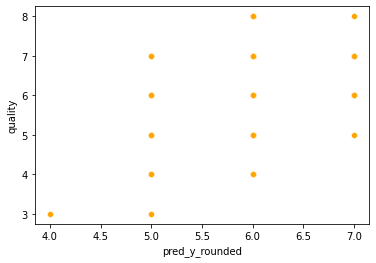

In [61]:
pred_vs_acc = pd.concat([(pd.DataFrame(y_pred_rounded, columns=["pred_y_rounded"])), red_test_y], axis = 1)
sns.scatterplot(x = 'pred_y_rounded', y = 'quality', data = pred_vs_acc, color = 'orange')

# Tuning White Model

In [85]:
n_samples = white_train_x.shape[0]
n_features = white_train_x.shape[1]

params = {'n_estimators': [2000, 3000, 4000],
          'max_features': list(range(2,8,2)),
          'bootstrap': [True, False]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
rf_regressor_grid.fit(white_train_x, white_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

Best Parameters :  {'bootstrap': False, 'max_features': 2, 'n_estimators': 4000}


In [92]:
# White Model with optimal parameters
optimal_model_white = RandomForestRegressor(n_estimators=4000, random_state=1, max_features = 2, bootstrap = False).fit(white_train_x, white_train_y)

y_pred = optimal_model_white.predict(white_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred))

RMSE: 0.5775704424746891
MAE: 0.3788204081632653


In [93]:
# White Model with optimal parameters + ROUNDING
optimal_model_white = RandomForestRegressor(n_estimators=850, random_state=1, max_features = 2, bootstrap = False).fit(white_train_x, white_train_y)

y_pred = optimal_model_white.predict(white_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred_rounded))

RMSE: 0.6388765649999399
MAE: 0.34448979591836737


In [178]:
# White Model with optimal parameters + ROUNDING +  manual tuning
optimal_model_white = RandomForestRegressor(n_estimators=1055, random_state=1, max_features = 2, bootstrap = False).fit(white_train_x, white_train_y)

y_pred = optimal_model_white.predict(white_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred_rounded))

RMSE: 0.6331005658902954
MAE: 0.33877551020408164


In [181]:
# White Model with optimal parameters + ROUNDING +  manual tuning
optimal_model_white = RandomForestRegressor(n_estimators=1055, random_state=1, max_features = 1, bootstrap = False).fit(white_train_x, white_train_y)

y_pred = optimal_model_white.predict(white_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(white_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(white_test_y, y_pred_rounded))

RMSE: 0.6414269805898185
MAE: 0.34448979591836737


# Tuning Combined Model

In [94]:
n_samples = combined_train_x.shape[0]
n_features = combined_train_x.shape[1]

params = {'n_estimators': [2000,3000,4000],
          'max_features': [2,3,4],
          'bootstrap': [True, False]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
rf_regressor_grid.fit(combined_train_x, combined_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

Best Parameters :  {'bootstrap': False, 'max_features': 2, 'n_estimators': 2000}


In [97]:
# Combined Model with optimal parameters
optimal_model_combined = RandomForestRegressor(n_estimators=2000, random_state=1, max_features = 2, bootstrap = False).fit(combined_train_x, combined_train_y)

y_pred = optimal_model_combined.predict(combined_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred))

RMSE: 0.5864623422889802
MAE: 0.3872643076923077


In [99]:
n_samples = combined_train_x.shape[0]
n_features = combined_train_x.shape[1]

params = {'n_estimators': [1000, 1500, 2000, 2500],
          'max_features': [2],
          'bootstrap': [True, False]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
rf_regressor_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
rf_regressor_grid.fit(combined_train_x, combined_train_y)
print('Best Parameters : ',rf_regressor_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

Best Parameters :  {'bootstrap': False, 'max_features': 2, 'n_estimators': 2000}


In [100]:
# Combined Model with optimal parameters
optimal_model_combined = RandomForestRegressor(n_estimators=2000, random_state=1, max_features = 2, bootstrap = False).fit(combined_train_x, combined_train_y)

y_pred = optimal_model_combined.predict(combined_test_x)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred))

RMSE: 0.5864623422889802
MAE: 0.3872643076923077


In [101]:
# combined Model + ROUNDING
optimal_model_combined = RandomForestRegressor(n_estimators=2000, random_state=1, max_features = 2, bootstrap = False).fit(combined_train_x, combined_train_y)

y_pred = optimal_model_combined.predict(combined_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred_rounded))

RMSE: 0.6406727233631369
MAE: 0.3476923076923077


In [126]:
# combined Model + ROUNDING + manual tune
optimal_model_combined = RandomForestRegressor(n_estimators=1100, random_state=1, max_features = 2, bootstrap = False).fit(combined_train_x, combined_train_y)

y_pred = optimal_model_combined.predict(combined_test_x)
y_pred_rounded = np.rint(y_pred)

#RMSE on test data
print("RMSE:",np.sqrt(mean_squared_error(combined_test_y, y_pred_rounded)))
#MAE on test data
print("MAE:",mean_absolute_error(combined_test_y, y_pred_rounded))

RMSE: 0.6319688405171693
MAE: 0.3403076923076923


<AxesSubplot:xlabel='pred_y_rounded', ylabel='quality'>

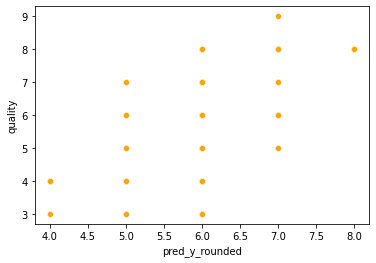

In [102]:
pred_vs_acc = pd.concat([(pd.DataFrame(y_pred_rounded, columns=["pred_y_rounded"])), combined_test_y], axis = 1)
sns.scatterplot(x = 'pred_y_rounded', y = 'quality', data = pred_vs_acc, color = 'orange')

## Summary MAE

In [109]:
# red
print("Red Base MAE: 0.365")
print("Red Tuned MAE: 0.3675")

improvement = 100*((0.365-0.3675)/0.365)
print("Improvement:", str(round(improvement, 2)), "%")

Red Base MAE: 0.365
Red Tuned MAE: 0.3675
Improvement: -0.68 %


In [112]:
# white
print("White Base MAE: 0.3485714285714286")
print("White Tuned MAE: 0.34448979591836737")

improvement = 100*((0.3485714285714286-0.34448979591836737)/0.3485714285714286)
print("Improvement:", str(round(improvement, 2)), "%")

White Base MAE: 0.3485714285714286
White Tuned MAE: 0.34448979591836737
Improvement: 1.17 %


In [113]:
# combined
print("Combined Base MAE: 0.35323076923076924")
print("Combined Tuned MAE: 0.3476923076923077")

improvement = 100*((0.35323076923076924-0.3476923076923077)/0.35323076923076924)
print("Improvement:", str(round(improvement, 2)), "%")

Combined Base MAE: 0.35323076923076924
Combined Tuned MAE: 0.3476923076923077
Improvement: 1.57 %


# Summary RMSE

In [108]:
# red
print("Red Base RMSE: 0.6670832032063166")
print("Red Tuned RMSE: 0.6652067347825036")

improvement = 100*((0.6670832032063166-0.6652067347825036)/0.6670832032063166)
print("Improvement:", str(round(improvement, 2)), "%")

Red Base RMSE: 0.6670832032063166
Red Tuned RMSE: 0.6652067347825036
Improvement: 0.28 %


In [179]:
# white
print("White Base RMSE: 0.6007932171687014")
print("White Tuned RMSE: 0.6331005658902954")

improvement = 100*((0.6007932171687014-  0.6331005658902954)/0.6007932171687014)
print("Improvement:", str(round(improvement, 2)), "%")

White Base RMSE: 0.6007932171687014
White Tuned RMSE: 0.6331005658902954
Improvement: -5.38 %


In [162]:
# combined
print("combined Base RMSE: 0.6487858482758982")
print("Combined Tuned RMSE:  0.6319688405171693")

improvement = 100*((0.6487858482758982- 0.6319688405171693)/0.6487858482758982)
print("Improvement:", str(round(improvement, 2)), "%")

combined Base RMSE: 0.6487858482758982
Combined Tuned RMSE:  0.6319688405171693
Improvement: 2.59 %
